In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
events_df = pd.read_csv('events.csv')
demand_df = pd.read_csv('demand.csv')
supply_df = pd.read_csv('supply.csv')

In [3]:
events_df.columns

Index(['city', 'year', 'month', 'content_eng', 'content_ko', 'type',
       'target_audience', 'duration', 'size', 'frequency', 'index', 'day',
       'collaboration', 'end_year', 'end_month', 'end_day'],
      dtype='object')

In [4]:
demand_df.columns

Index(['city', 'year', 'month', 'month_name', 'unit', 'patients',
       'bilateral thyroidectomy patients', 'bilateral thyroidectomy unit',
       'aortic valve replacement patients', 'aortic valve replacement unit',
       'graft replacement of aorta patients',
       'graft replacement of aorta unit', 'pda ligation patients',
       'pda ligation unit', 'exploratory laparotomy patients',
       'exploratory laparotomy unit', 'laparoscopic cholecystectomy patients',
       'laparoscopic cholecystectomy unit',
       'pylorus preserving pancreaticoduodenectomy patients',
       'pylorus preserving pancreaticoduodenectomy unit',
       'transurethral resection of prostate patients',
       'transurethral resection of prostate unit', 'prostatectomy patients',
       'prostatectomy unit', 'total abdominal hysterectomy patients',
       'total abdominal hysterectomy unit',
       'low cervical cesarean section patients',
       'low cervical cesarean section unit', 'total hip replacement 

In [5]:
supply_df.columns

Index(['city', 'year', 'month', 'composition_rate', 'total_unit', 'women_unit',
       'men_unit'],
      dtype='object')

In [6]:
events_cities = events_df['city'].unique()
demand_cities = demand_df['city'].unique()
supply_cities = supply_df['city'].unique()

print(set(events_cities) - set(demand_cities))
print(set(events_cities) - set(supply_cities))


{nan}
{nan}


In [7]:
df = supply_df.copy()
filtered_demand = demand_df[["city", "year", "month", "unit", "patients"]]
# merge with demand
df = df.merge(filtered_demand, on=['city', 'year', "month"], how='inner')

df.isnull().sum()

city                0
year                0
month               0
composition_rate    0
total_unit          0
women_unit          0
men_unit            0
unit                0
patients            0
dtype: int64

In [8]:
df.describe()

,year,month,composition_rate,total_unit,women_unit,men_unit,unit,patients
count,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000
mean,2014.000000,6.500000,9.804110,16176.410256,4441.907617,11734.502640,16092.669776,6488.173831
std,4.899903,3.452704,5.303586,14760.565089,4362.656222,10513.615182,15829.503567,6554.604701
min,2006.000000,1.000000,5.100000,1579.000000,271.000000,1308.000000,1534.761504,536.000000
25%,2010.000000,3.750000,7.900000,8269.000000,1860.000000,6309.000000,5218.074469,2078.000000
50%,2014.000000,6.500000,8.400000,12751.500000,3215.500000,9477.000000,11461.384561,4631.000000
75%,2018.000000,9.250000,9.000000,17832.500000,5252.250000,12651.750000,17148.140582,6980.750000
max,2022.000000,12.000000,41.600000,83785.000000,25805.000000,59429.000000,74598.601184,32164.000000


In [9]:
# change names
df = df.rename(columns={"unit": "demand_unit", "patients": "demand_patients"})
df = df.rename(columns={"total_unit": "supply_unit"})

In [10]:
df["supply_ratio"] = df["supply_unit"] / df["demand_patients"]

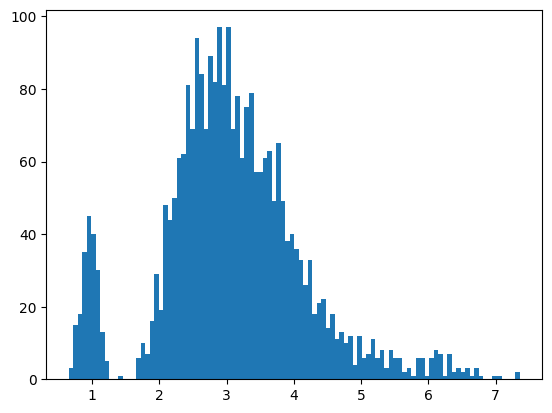

In [11]:
import matplotlib.pyplot as plt
# plot the supply ratio 

plt.hist(df["supply_ratio"], bins=100)
plt.show()


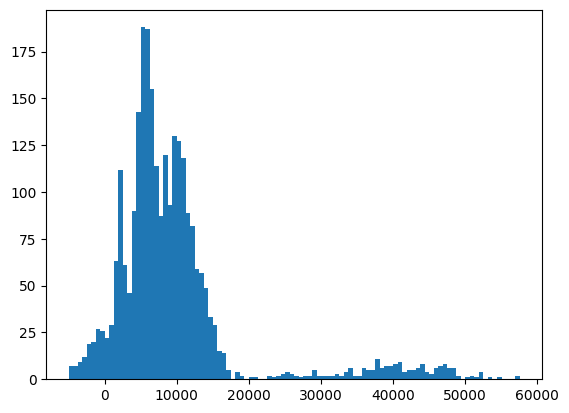

In [12]:
df["supply_demand_diff"] = df["supply_unit"] - df["demand_patients"]

plt.hist(df["supply_demand_diff"], bins=100)
plt.show()

In [13]:
cities = df["city"].unique()


print(cities)


# Convert the categorical variable into dummy variables
# do not add prefix
df_w_city = pd.get_dummies(df, columns=["city"], prefix="", prefix_sep="")

print(df_w_city.columns)

# count columns that have city_ prefix
city_columns = df_w_city.columns[-13:]

print(city_columns)


print(len(city_columns) - len(cities))

['Busan' 'Chungbuk' 'Daegu/Gyeongbuk' 'Daejeon/Chungnam' 'Gangwon'
 'Gyeonggi' 'Gyeongnam' 'Incheon' 'Jeju' 'Jeonbuk' 'Jeonnam' 'Ulsan'
 'Seoul']
Index(['year', 'month', 'composition_rate', 'supply_unit', 'women_unit',
       'men_unit', 'demand_unit', 'demand_patients', 'supply_ratio',
       'supply_demand_diff', 'Busan', 'Chungbuk', 'Daegu/Gyeongbuk',
       'Daejeon/Chungnam', 'Gangwon', 'Gyeonggi', 'Gyeongnam', 'Incheon',
       'Jeju', 'Jeonbuk', 'Jeonnam', 'Seoul', 'Ulsan'],
      dtype='object')
Index(['Busan', 'Chungbuk', 'Daegu/Gyeongbuk', 'Daejeon/Chungnam', 'Gangwon',
       'Gyeonggi', 'Gyeongnam', 'Incheon', 'Jeju', 'Jeonbuk', 'Jeonnam',
       'Seoul', 'Ulsan'],
      dtype='object')
0


In [14]:
seasion_map = {
    "1": "winter",
    "2": "winter",
    "3": "spring",
    "4": "spring",
    "5": "spring",
    "6": "summer",
    "7": "summer",
    "8": "summer",
    "9": "fall",
    "10": "fall",
    "11": "fall",
    "12": "winter"
}

In [15]:
df_w_city["season"] = df_w_city["month"].astype(str).map(seasion_map)

In [16]:
df_w_city["season"].isnull().sum()

# create a dummy variable for season
df_w_season = pd.get_dummies(df_w_city, columns=["season"], prefix="", prefix_sep="")

In [128]:
seasons = df_w_city["season"].unique()

In [129]:
df_w_season.columns
# make cities to int value 
df_w_season[cities] = df_w_season[cities].astype(int)

df_w_season[seasons] = df_w_season[seasons].astype(int)

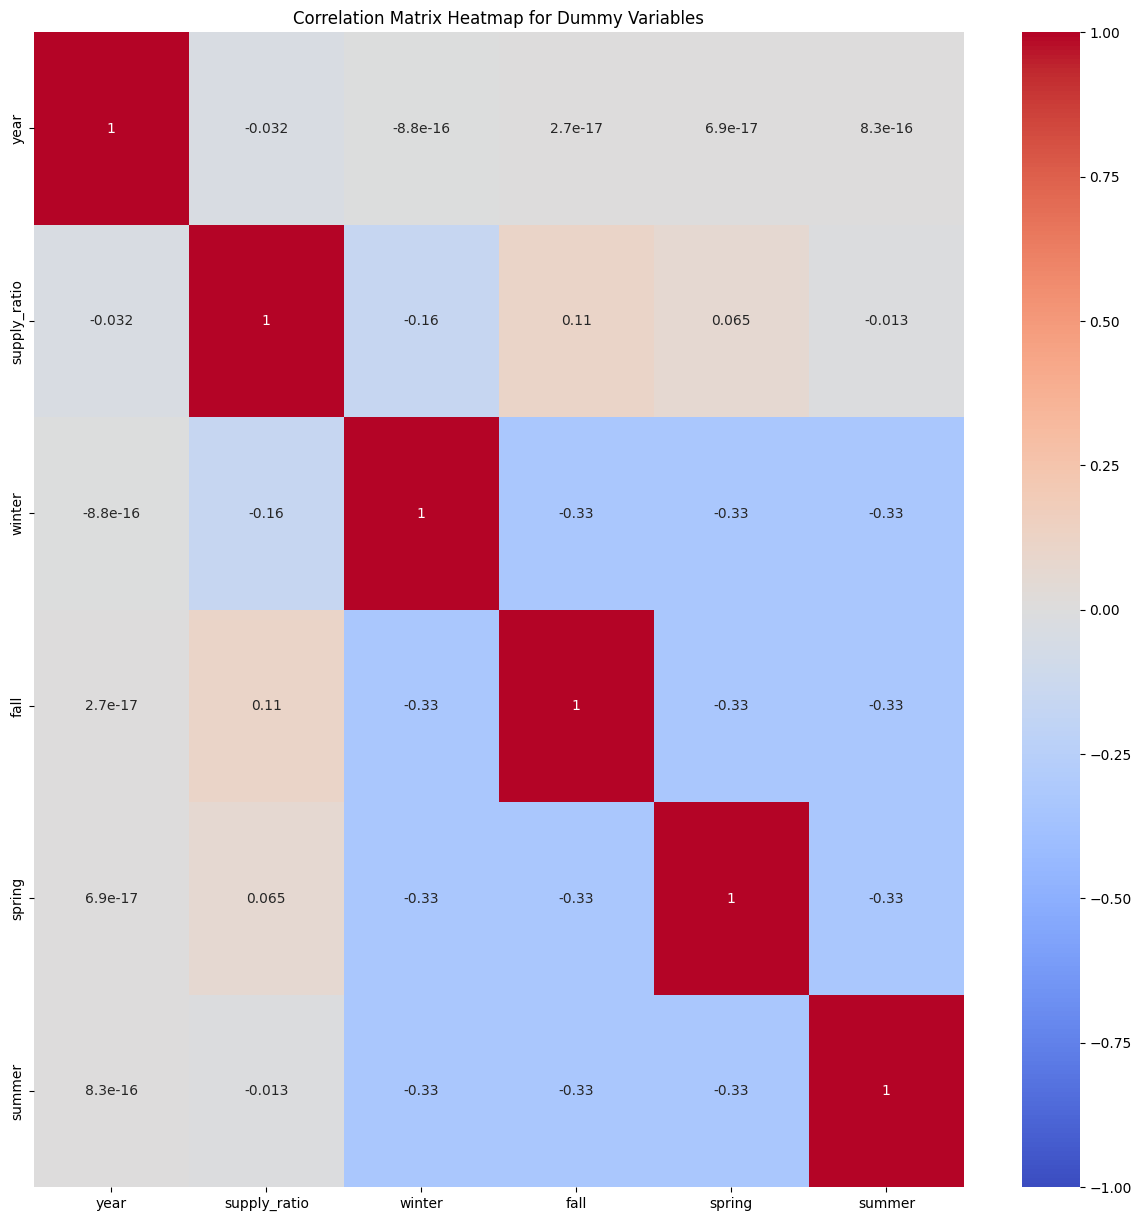

In [130]:
import seaborn as sns

# plot the correlation matrix
df_w_season_corr = df_w_season[["year", "supply_ratio"] + seasons.tolist()].corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df_w_season_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for Dummy Variables')
plt.show()

In [131]:
df_w_season["city"] = df["city"]
df_w_season.head()

,year,month,composition_rate,supply_unit,women_unit,men_unit,demand_unit,demand_patients,supply_ratio,supply_demand_diff,...,Jeju,Jeonbuk,Jeonnam,Seoul,Ulsan,fall,spring,summer,winter,city
0,2006,1,7.8,16581.0,4100.0,12481.0,14643.534483,5854,2.832422,10727.0,...,0,0,0,0,0,0,0,0,1,Busan
1,2006,10,7.4,15650.0,4115.0,11535.0,12733.553902,4912,3.186075,10738.0,...,0,0,0,0,0,1,0,0,0,Busan
2,2006,11,8.4,17801.0,4658.0,13143.0,13054.406800,5104,3.487657,12697.0,...,0,0,0,0,0,1,0,0,0,Busan
3,2006,12,8.0,16996.0,4552.0,12444.0,13137.054373,5186,3.277285,11810.0,...,0,0,0,0,0,0,0,0,1,Busan
4,2006,2,8.3,17608.0,5509.0,12099.0,13740.795515,5456,3.227273,12152.0,...,0,0,0,0,0,0,0,0,1,Busan


In [132]:
# now we have to connect events to the year and month monthly
events_df.columns

Index(['city', 'year', 'month', 'content_eng', 'content_ko', 'type',
       'target_audience', 'duration', 'size', 'frequency', 'index', 'day',
       'collaboration', 'end_year', 'end_month', 'end_day'],
      dtype='object')

In [133]:
worthy_columns = ["type", "target_audience", "duration", "size", "frequency"]

In [134]:
events_df["type"].value_counts()

type
public event                  235
infrastructure improvement     54
broadcast campaigns            36
community event                26
competition                    18
partnership                    17
policy reform                  16
corporation event               8
government event                5
conference                      4
internal event                  2
Name: count, dtype: int64

In [135]:
events_df_copy = events_df.copy()

collaboration_lists = events_df["collaboration"].str.split(",")

collaboration_keys = set() 

for collaboration_list in collaboration_lists:
    if isinstance(collaboration_list, list):
        collaboration_keys.update(collaboration_list)

for i, collaboration_list in enumerate(collaboration_lists):
    if isinstance(collaboration_list, list):
        for collaboration in collaboration_list:
            events_df_copy.loc[i, "c_" + collaboration] = 1

In [136]:
collaboration_keys = list(collaboration_keys)

In [137]:
for key in collaboration_keys:
    events_df_copy["c_" + key] = events_df_copy["c_" + key].fillna(0).astype(int)

events_df_copy.describe()



,year,month,index,day,end_year,end_month,end_day,c_celebrity,c_media,c_government,c_community,c_corporation,c_university,c_hospital
count,421.000000,421.000000,421.000000,329.000000,2.0,2.000000,2.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,2013.541568,6.973872,177.223278,14.562310,2016.0,8.000000,11.500000,0.057007,0.092637,0.123515,0.180523,0.109264,0.087886,0.014252
std,4.839452,3.103267,99.785950,7.826427,0.0,4.242641,0.707107,0.232132,0.290267,0.329419,0.385080,0.312341,0.283466,0.118668
min,2005.000000,1.000000,0.000000,1.000000,2016.0,5.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,5.000000,92.000000,9.000000,2016.0,6.500000,11.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,7.000000,176.000000,14.000000,2016.0,8.000000,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,10.000000,260.000000,20.000000,2016.0,9.500000,11.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023.000000,12.000000,355.000000,31.000000,2016.0,11.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
collaboration_keys

['media',
 'hospital',
 'community',
 'corporation',
 'government',
 'celebrity',
 'university']

In [139]:
events_df_copy.columns

events_df_copy["type"] = events_df["type"]
events_df_copy["target_audience"] = events_df["target_audience"]
events_df_copy["duration"] = events_df["duration"]
events_df_copy["size"] = events_df["size"]
events_df_copy["frequency"] = events_df["frequency"]


events_dict = {
    "city": [],
    "year": [],
    "month": [],
    "city_local_cnt": [],
    "national_cnt": [],
    "local_cnt": [],
}

for key in collaboration_keys:
    events_dict["national_" + "colab_" + key] = []
    events_dict["colab_" + key] = []

type_keys = events_df_copy["type"].unique()
# create dummy variables for type

for key in type_keys:
    events_dict["national_" + "type_" + key] = []
    events_dict["type_" + key] = []

target_audience_keys = events_df_copy["target_audience"].unique()

for key in target_audience_keys:
    events_dict["national_" + "target_" + key] = []
    events_dict["target_" + key] = []

duration_keys = events_df_copy["duration"].unique()

for key in duration_keys:
    events_dict["national_" + "duration_" + key] = []
    events_dict["duration_" + key] = []

size_keys = events_df_copy["size"].unique()

for key in size_keys:
    events_dict["national_" + "size_" + key] = []
    events_dict["size_" + key] = []

frequency_keys = events_df_copy["frequency"].unique()

for key in frequency_keys:
    events_dict["national_" + "freq_" + key] = []
    events_dict["freq_" + key] = []

# preserve the original columns
events_df_copy = pd.get_dummies(events_df_copy, columns=["type", "target_audience", "duration", "size", "frequency"], prefix="", prefix_sep="")

# events_df_copy["type"] = events_df["type"]
# events_df_copy["target_audience"] = events_df["target_audience"]
# events_df_copy["duration"] = events_df["duration"]
# events_df_copy["size"] = events_df["size"]
# events_df_copy["frequency"] = events_df["frequency"]


# check if there are overlapping columns
events_df_copy.columns


Index(['city', 'year', 'month', 'content_eng', 'content_ko', 'index', 'day',
       'collaboration', 'end_year', 'end_month', 'end_day', 'c_celebrity',
       'c_media', 'c_government', 'c_community', 'c_corporation',
       'c_university', 'c_hospital', 'broadcast campaigns', 'community event',
       'competition', 'conference', 'corporation event', 'government event',
       'infrastructure improvement', 'internal event', 'partnership',
       'policy reform', 'public event', 'blood donors', 'citizen', 'community',
       'corporations', 'government', 'hospital', 'institutions', 'teenagers',
       'university', 'months long', 'multi day', 'ongoing', 'single day',
       'international', 'local', 'national', 'ad hoc', 'monthly', 'yearly'],
      dtype='object')

In [140]:


cities = df["city"].unique()
year = df["year"].unique()
month = df["month"].unique()

for city in cities:
    for y in year:
        for m in month:
            # national events are where "city" is empty
            national_events = events_df_copy[events_df_copy["city"].isnull()]
            national_events = national_events[national_events["year"] == y]
            national_events = national_events[national_events["month"] == m]
            all_local_events = events_df_copy[~events_df_copy["city"].isnull()]
            all_local_events = all_local_events[all_local_events["year"] == y]
            all_local_events = all_local_events[all_local_events["month"] == m]
            filtered = events_df_copy[events_df_copy["city"] == city]
            filtered = filtered[filtered["year"] == y]
            filtered = filtered[filtered["month"] == m]
            events_dict["city_local_cnt"].append(filtered.shape[0])
            events_dict["national_cnt"].append(national_events.shape[0])
            events_dict["local_cnt"].append(all_local_events.shape[0])
            for key in collaboration_keys:
                add_key = "colab_"
                events_dict["national_" + add_key + key].append(national_events["c_" + key].sum())
                events_dict[add_key + key].append(filtered["c_" + key].sum())
                # print(national_events[key].sum())
                # print(filtered[key].sum())
            for key in type_keys:
                add_key = "type_"
                events_dict["national_" + add_key + key].append(national_events[key].sum())
                events_dict[add_key + key].append(filtered[key].sum())
            for key in target_audience_keys:
                add_key = "target_"
                events_dict["national_" + add_key + key].append(national_events[key].sum())
                events_dict[add_key + key].append(filtered[key].sum())
            for key in duration_keys:
                add_key = "duration_"
                events_dict["national_" + add_key + key].append(national_events[key].sum())
                events_dict[add_key + key].append(filtered[key].sum())
            for key in size_keys:
                add_key = "size_"
                events_dict["national_" + add_key + key].append(national_events[key].sum())
                events_dict[add_key + key].append(filtered[key].sum())
            for key in frequency_keys:
                add_key = "freq_"
                events_dict["national_" + add_key + key].append(national_events[key].sum())
                events_dict[add_key + key].append(filtered[key].sum())
            



            events_dict["city"].append(city)
            events_dict["year"].append(y)
            events_dict["month"].append(m)


In [141]:
for key in events_dict.keys():
    print(key, len(events_dict[key]))

city 2652
year 2652
month 2652
city_local_cnt 2652
national_cnt 2652
local_cnt 2652
national_colab_media 2652
colab_media 2652
national_colab_hospital 2652
colab_hospital 2652
national_colab_community 2652
colab_community 2652
national_colab_corporation 2652
colab_corporation 2652
national_colab_government 2652
colab_government 2652
national_colab_celebrity 2652
colab_celebrity 2652
national_colab_university 2652
colab_university 2652
national_type_public event 2652
type_public event 2652
national_type_competition 2652
type_competition 2652
national_type_broadcast campaigns 2652
type_broadcast campaigns 2652
national_type_policy reform 2652
type_policy reform 2652
national_type_infrastructure improvement 2652
type_infrastructure improvement 2652
national_type_conference 2652
type_conference 2652
national_type_corporation event 2652
type_corporation event 2652
national_type_community event 2652
type_community event 2652
national_type_partnership 2652
type_partnership 2652
national_type_

In [142]:
# save the events dictionary
monthly_event_count_df = pd.DataFrame(events_dict)
monthly_event_count_df.to_csv("monthly_event_count.csv", index=False)

In [143]:
# now we have to merge the events with the supply and demand data

df_w_season.columns

Index(['year', 'month', 'composition_rate', 'supply_unit', 'women_unit',
       'men_unit', 'demand_unit', 'demand_patients', 'supply_ratio',
       'supply_demand_diff', 'Busan', 'Chungbuk', 'Daegu/Gyeongbuk',
       'Daejeon/Chungnam', 'Gangwon', 'Gyeonggi', 'Gyeongnam', 'Incheon',
       'Jeju', 'Jeonbuk', 'Jeonnam', 'Seoul', 'Ulsan', 'fall', 'spring',
       'summer', 'winter', 'city'],
      dtype='object')

In [144]:
print(len(df_w_season))

2652


In [145]:
print(len(monthly_event_count_df))

2652


In [146]:
merged = df_w_season.merge(monthly_event_count_df, on=["city", "year", "month"], how="inner")

In [147]:
print(len(merged))

2652


In [148]:
# change all the True to 1 and False to 0

In [149]:
# save merged
merged.to_csv("merged.csv", index=False)



In [195]:
# check if there are any missing values
print(merged.isnull().sum().sum())
print(merged.isna().sum().sum())


0
0


In [153]:
monthly_event_count_df[seasons] = merged[seasons].astype(int)
monthly_event_count_df.columns[3:]

Index(['city_local_cnt', 'national_cnt', 'local_cnt', 'national_colab_media',
       'colab_media', 'national_colab_hospital', 'colab_hospital',
       'national_colab_community', 'colab_community',
       'national_colab_corporation', 'colab_corporation',
       'national_colab_government', 'colab_government',
       'national_colab_celebrity', 'colab_celebrity',
       'national_colab_university', 'colab_university',
       'national_type_public event', 'type_public event',
       'national_type_competition', 'type_competition',
       'national_type_broadcast campaigns', 'type_broadcast campaigns',
       'national_type_policy reform', 'type_policy reform',
       'national_type_infrastructure improvement',
       'type_infrastructure improvement', 'national_type_conference',
       'type_conference', 'national_type_corporation event',
       'type_corporation event', 'national_type_community event',
       'type_community event', 'national_type_partnership', 'type_partnership',
   

In [247]:
noteworthy_columns = monthly_event_count_df.columns[2:]

# exclude the ones that have national in the column name
noteworthy_columns = [col for col in noteworthy_columns if "national" not in col]

national_columns = [col for col in monthly_event_count_df.columns if "national" in col]
national_type_columns = [col for col in national_columns if "type" in col]
national_colaborations_columns = [col for col in national_columns if "colab" in col]
national_target_columns = [col for col in national_columns if "target" in col]

type_columns = [col for col in noteworthy_columns if "type" in col]
colaborations_columns = [col for col in noteworthy_columns if "colab" in col]
target_columns = [col for col in noteworthy_columns if "target" in col]

noteworthy_columns = seasons.tolist() + colaborations_columns + type_columns + national_colaborations_columns + national_type_columns


print(noteworthy_columns)

['winter', 'fall', 'spring', 'summer', 'colab_media', 'colab_hospital', 'colab_community', 'colab_corporation', 'colab_government', 'colab_celebrity', 'colab_university', 'type_public event', 'type_competition', 'type_broadcast campaigns', 'type_policy reform', 'type_infrastructure improvement', 'type_conference', 'type_corporation event', 'type_community event', 'type_partnership', 'type_internal event', 'type_government event', 'national_colab_media', 'national_colab_hospital', 'national_colab_community', 'national_colab_corporation', 'national_colab_government', 'national_colab_celebrity', 'national_colab_university', 'national_type_public event', 'national_type_competition', 'national_type_broadcast campaigns', 'national_type_policy reform', 'national_type_infrastructure improvement', 'national_type_conference', 'national_type_corporation event', 'national_type_community event', 'national_type_partnership', 'national_type_internal event', 'national_type_government event']


In [248]:
cities

array(['Busan', 'Chungbuk', 'Daegu/Gyeongbuk', 'Daejeon/Chungnam',
       'Gangwon', 'Gyeonggi', 'Gyeongnam', 'Incheon', 'Jeju', 'Jeonbuk',
       'Jeonnam', 'Ulsan', 'Seoul'], dtype=object)

In [273]:
import statsmodels.api as sm

filtered = merged[merged["city"] == "Ulsan"]
# Step 4: Add a constant (this represents the intercept in the regression model)
X = filtered[noteworthy_columns]
X = sm.add_constant(X)

y = filtered["supply_ratio"]


# Set pandas display option to avoid scientific notation
pd.set_option('display.float_format', '{:.6f}'.format)

# Step 5: Create and fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit()

# Step 6: View model summary to see coefficients, p-values, etc.
# print(model.summary())

# give me only the coefficients that have p-value less than 0.05
# print(model.pvalues[model.pvalues < 0.05])
print(model.params[model.pvalues < 0.05])

# Extract the R-squared value directly
r_squared = model.rsquared
print(f"R-squared: {r_squared}")

# If you want adjusted R-squared:
adjusted_r_squared = model.rsquared_adj
print(f"Adjusted R-squared: {adjusted_r_squared}")

const                      2.953621
winter                     0.392269
fall                       1.021521
spring                     0.804262
summer                     0.735569
national_colab_celebrity   0.675013
dtype: float64
R-squared: 0.2781953483515014
Adjusted R-squared: 0.1674639529281522
